Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
%matplotlib inline

Loading Dataset

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='WiDi833wSEHQZbeoeJfZgz2thD4bULAm72z9f_zt3AfY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'earlydetectionofchronickidneydise-donotdelete-pr-w6e8tegrdivdvc'
object_key = 'chronickidneydisease.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data=df_data_1
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


Renaming the columns

In [4]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
# Dropping unneccsary feature :
data = data.drop('id', axis=1)

In [6]:
# Shape of dataset:
data.shape

(400, 25)

In [7]:
#manullay renaming the column names
data.columns=['age','bloodpressure','specificgravity','albumin','sugar','redbloodcells','puscell','puscellclumps','bacteria','bloodglucoserandom','bloodurea','serumcreatinine','sodium','potassium','haemoglobin','packedcellvolume','whitebloodcellcount','redbloodcellcount','hypertension','diabetesmellitus','coronaryarterydisease','appetite','pedaledema','anemia','class']
data

,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,bloodglucoserandom,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


Descriptive statistics of the dataset

In [8]:
data.describe()

,age,bloodpressure,specificgravity,albumin,sugar,bloodglucoserandom,bloodurea,serumcreatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


Data Preprocessing

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    391 non-null    float64
 1   bloodpressure          388 non-null    float64
 2   specificgravity        353 non-null    float64
 3   albumin                354 non-null    float64
 4   sugar                  351 non-null    float64
 5   redbloodcells          248 non-null    object 
 6   puscell                335 non-null    object 
 7   puscellclumps          396 non-null    object 
 8   bacteria               396 non-null    object 
 9   bloodglucoserandom     356 non-null    float64
 10  bloodurea              381 non-null    float64
 11  serumcreatinine        383 non-null    float64
 12  sodium                 313 non-null    float64
 13  potassium              312 non-null    float64
 14  haemoglobin            348 non-null    float64
 15  packed

In [10]:
#checking the missing values
data.isnull().sum()

age                        9
bloodpressure             12
specificgravity           47
albumin                   46
sugar                     49
redbloodcells            152
puscell                   65
puscellclumps              4
bacteria                   4
bloodglucoserandom        44
bloodurea                 19
serumcreatinine           17
sodium                    87
potassium                 88
haemoglobin               52
packedcellvolume          70
whitebloodcellcount      105
redbloodcellcount        130
hypertension               2
diabetesmellitus           2
coronaryarterydisease      2
appetite                   1
pedaledema                 1
anemia                     1
class                      0
dtype: int64

In [11]:
#Replacing Categorical values with numbers
#red blood cells
data['redbloodcells'].value_counts()
data['redbloodcells'] = data['redbloodcells'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})
#pus cell
data['puscell'].value_counts()
data['puscell'] = data['puscell'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})
#pus cell clumps
data['puscellclumps'].value_counts()
data['puscellclumps'] = data['puscellclumps'].replace(to_replace = {'notpresent':0,'present':1})
#bacteria
data['bacteria'].value_counts()
data['bacteria'] = data['bacteria'].replace(to_replace = {'notpresent':0,'present':1})
#hypertension
data['hypertension'].value_counts()
data['hypertension'] = data['hypertension'].replace(to_replace = {'yes' : 1, 'no' : 0})
#diabetes mellitus
data['diabetesmellitus'].value_counts()
data['diabetesmellitus'] = data['diabetesmellitus'].replace(to_replace = {'\tyes':'yes', ' yes':'yes', '\tno':'no'})
data['diabetesmellitus'] = data['diabetesmellitus'].replace(to_replace = {'yes' : 1, 'no' : 0})
#coronary artery disease
data['coronaryarterydisease'].value_counts()
data['coronaryarterydisease'] = data['coronaryarterydisease'].replace(to_replace = {'\tno':'no'})
data['coronaryarterydisease'] = data['coronaryarterydisease'].replace(to_replace = {'yes' : 1, 'no' : 0})
#appetite
data['appetite'].unique()
data['appetite'] = data['appetite'].replace(to_replace={'good':1,'poor':0,'no':np.nan})
#pedal edema
data['pedaledema'].value_counts()
data['pedaledema'] = data['pedaledema'].replace(to_replace = {'yes' : 1, 'no' : 0})
#anemia
data['anemia'].value_counts()
data['anemia'] = data['anemia'].replace(to_replace = {'yes' : 1, 'no' : 0})
#class
data['class'].value_counts()
data['class'] = data['class'].replace(to_replace={'ckd\t':'ckd'})
data["class"] = [1 if i == "ckd" else 0 for i in data["class"]]



In [12]:
data.head()

,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,bloodglucoserandom,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [13]:
data.dtypes

age                      float64
bloodpressure            float64
specificgravity          float64
albumin                  float64
sugar                    float64
redbloodcells            float64
puscell                  float64
puscellclumps            float64
bacteria                 float64
bloodglucoserandom       float64
bloodurea                float64
serumcreatinine          float64
sodium                   float64
potassium                float64
haemoglobin              float64
packedcellvolume          object
whitebloodcellcount       object
redbloodcellcount         object
hypertension             float64
diabetesmellitus         float64
coronaryarterydisease    float64
appetite                 float64
pedaledema               float64
anemia                   float64
class                      int64
dtype: object

In [14]:
#Converting Object values into Numeric values
data['packedcellvolume'] = pd.to_numeric(data['packedcellvolume'], errors='coerce')
data['whitebloodcellcount'] = pd.to_numeric(data['whitebloodcellcount'], errors='coerce')
data['redbloodcellcount'] = pd.to_numeric(data['redbloodcellcount'], errors='coerce')

In [15]:
data.dtypes

age                      float64
bloodpressure            float64
specificgravity          float64
albumin                  float64
sugar                    float64
redbloodcells            float64
puscell                  float64
puscellclumps            float64
bacteria                 float64
bloodglucoserandom       float64
bloodurea                float64
serumcreatinine          float64
sodium                   float64
potassium                float64
haemoglobin              float64
packedcellvolume         float64
whitebloodcellcount      float64
redbloodcellcount        float64
hypertension             float64
diabetesmellitus         float64
coronaryarterydisease    float64
appetite                 float64
pedaledema               float64
anemia                   float64
class                      int64
dtype: object

Handling Null Values

In [16]:
features=['age','bloodpressure','specificgravity','albumin','sugar','redbloodcells','puscell','puscellclumps','bacteria','bloodglucoserandom','bloodurea','serumcreatinine','sodium','potassium','haemoglobin','packedcellvolume','whitebloodcellcount','redbloodcellcount','hypertension','diabetesmellitus','coronaryarterydisease','appetite','pedaledema','anemia']
for i in features:
    data[i] = data[i].fillna(data[i].median())

In [17]:
data = data.rename(columns={'class':'target'})
print(data)

      age  bloodpressure  specificgravity  albumin  sugar  redbloodcells  \
0    48.0           80.0            1.020      1.0    0.0            0.0   
1     7.0           50.0            1.020      4.0    0.0            0.0   
2    62.0           80.0            1.010      2.0    3.0            0.0   
3    48.0           70.0            1.005      4.0    0.0            0.0   
4    51.0           80.0            1.010      2.0    0.0            0.0   
..    ...            ...              ...      ...    ...            ...   
395  55.0           80.0            1.020      0.0    0.0            0.0   
396  42.0           70.0            1.025      0.0    0.0            0.0   
397  12.0           80.0            1.020      0.0    0.0            0.0   
398  17.0           60.0            1.025      0.0    0.0            0.0   
399  58.0           80.0            1.025      0.0    0.0            0.0   

     puscell  puscellclumps  bacteria  bloodglucoserandom  ...  \
0        0.0         

In [18]:
data.isnull().any().sum()

0

In [19]:
data.isnull().sum()

age                      0
bloodpressure            0
specificgravity          0
albumin                  0
sugar                    0
redbloodcells            0
puscell                  0
puscellclumps            0
bacteria                 0
bloodglucoserandom       0
bloodurea                0
serumcreatinine          0
sodium                   0
potassium                0
haemoglobin              0
packedcellvolume         0
whitebloodcellcount      0
redbloodcellcount        0
hypertension             0
diabetesmellitus         0
coronaryarterydisease    0
appetite                 0
pedaledema               0
anemia                   0
target                   0
dtype: int64

Exploratory Data Analaysis

In [20]:
#correlation
data.corr()

,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,bloodglucoserandom,...,packedcellvolume,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,target
age,1.000000,0.136316,-0.160374,0.085918,0.186750,0.014904,0.102286,0.157401,0.042427,0.230731,...,-0.212796,0.093794,-0.203199,0.395073,0.364306,0.231419,-0.156581,0.094772,0.052938,0.227842
bloodpressure,0.136316,1.000000,-0.166980,0.123518,0.189561,0.150384,0.156231,0.056808,0.110164,0.150180,...,-0.289237,0.022177,-0.219317,0.266901,0.226489,0.084135,-0.175054,0.056902,0.195134,0.293693
specificgravity,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,-0.253894,-0.365353,-0.306426,-0.231704,-0.299413,...,0.496434,-0.195068,0.432222,-0.323643,-0.351016,-0.135814,0.230975,-0.253803,-0.184155,-0.659504
albumin,0.085918,0.123518,-0.479962,1.000000,0.287751,0.394844,0.561713,0.417868,0.377935,0.293150,...,-0.473446,0.202920,-0.405092,0.406057,0.308101,0.200957,-0.303145,0.411080,0.229556,0.531562
sugar,0.186750,0.189561,-0.292053,0.287751,1.000000,0.092940,0.190062,0.168091,0.119399,0.627002,...,-0.181285,0.156649,-0.161994,0.254268,0.430514,0.229301,-0.069216,0.116442,0.042464,0.294555
redbloodcells,0.014904,0.150384,-0.253894,0.394844,0.092940,1.000000,0.377394,0.102948,0.184402,0.138615,...,-0.279875,-0.003471,-0.196534,0.140538,0.145646,0.111493,-0.160868,0.199285,0.107625,0.282642
puscell,0.102286,0.156231,-0.365353,0.561713,0.190062,0.377394,1.000000,0.520118,0.330401,0.247665,...,-0.418435,0.106733,-0.381949,0.291719,0.201032,0.172295,-0.274985,0.350227,0.260566,0.375154
puscellclumps,0.157401,0.056808,-0.306426,0.417868,0.168091,0.102948,0.520118,1.000000,0.275082,0.195223,...,-0.296580,0.163215,-0.263810,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
bacteria,0.042427,0.110164,-0.231704,0.377935,0.119399,0.184402,0.330401,0.275082,1.000000,0.079162,...,-0.189420,0.104748,-0.192212,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871
bloodglucoserandom,0.230731,0.150180,-0.299413,0.293150,0.627002,0.138615,0.247665,0.195223,0.079162,1.000000,...,-0.258200,0.119881,-0.214094,0.367816,0.503254,0.207020,-0.177285,0.094806,0.112449,0.379321


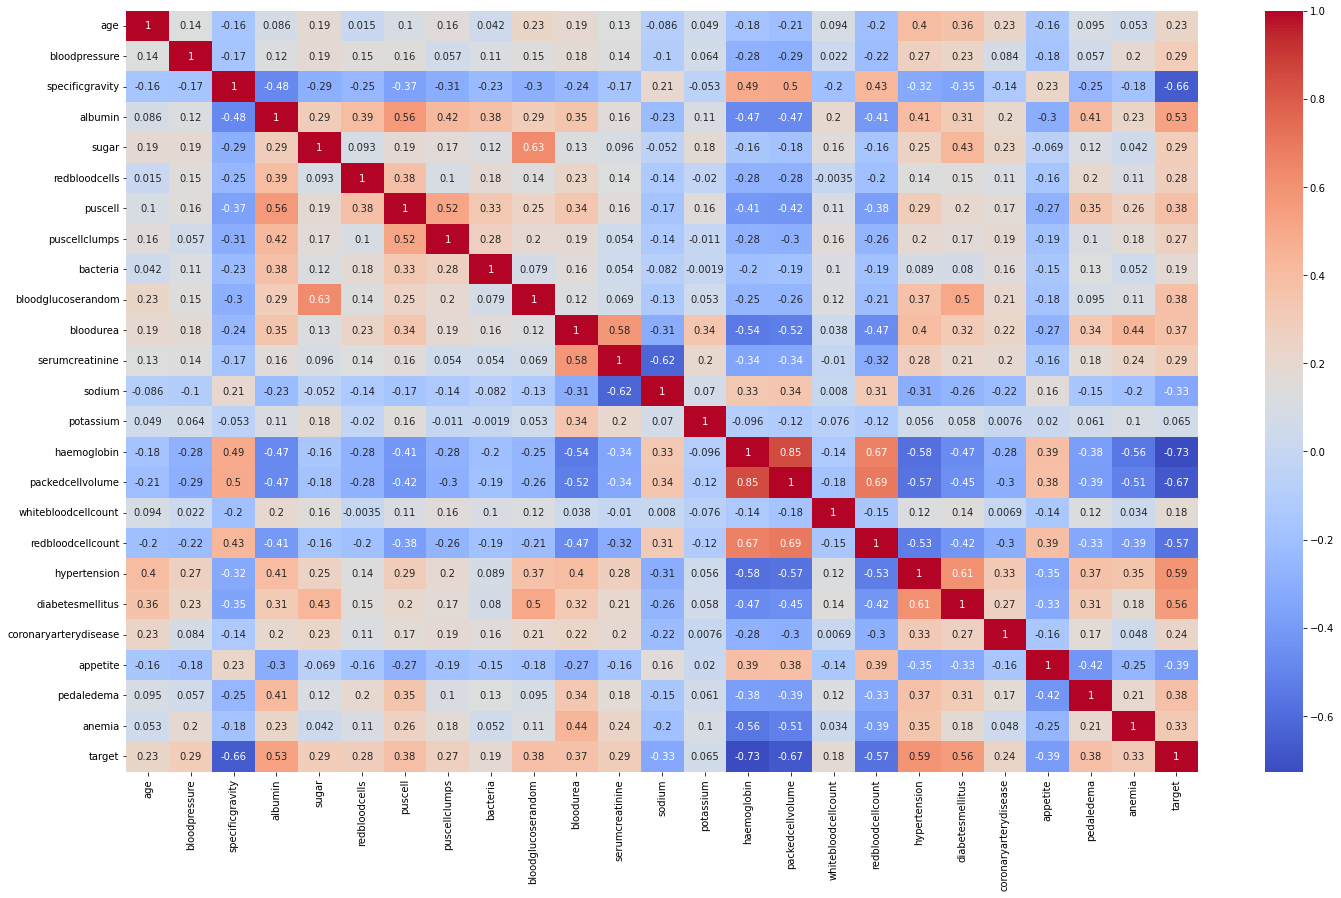

In [21]:
mlt.figure(figsize=(24,14))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
mlt.show()

In [22]:
#We clearly see that 'pcv' and 'hemo' feature has 85% multicollinearity
#So we remove one of the feature. i.e pcv
data.drop('packedcellvolume', axis=1, inplace=True)
data

,age,bloodpressure,specificgravity,albumin,sugar,redbloodcells,puscell,puscellclumps,bacteria,bloodglucoserandom,...,haemoglobin,whitebloodcellcount,redbloodcellcount,hypertension,diabetesmellitus,coronaryarterydisease,appetite,pedaledema,anemia,target
0,48.0,80.0,1.020,1.0,0.0,0.0,0.0,0.0,0.0,121.0,...,15.4,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0.0,0.0,0.0,0.0,121.0,...,11.3,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0.0,0.0,0.0,0.0,423.0,...,9.6,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0.0,1.0,1.0,0.0,117.0,...,11.2,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0.0,0.0,0.0,0.0,106.0,...,11.6,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,140.0,...,15.7,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0
396,42.0,70.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,75.0,...,16.5,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0
397,12.0,80.0,1.020,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,15.8,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0
398,17.0,60.0,1.025,0.0,0.0,0.0,0.0,0.0,0.0,114.0,...,14.2,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0


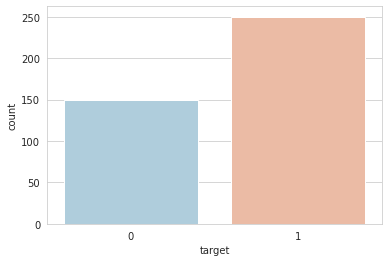

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=data,palette='RdBu_r')
mlt.show()

Split the data into dependent and independent variables

In [24]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
print(x)
print(y)
print(x.shape)
print(y.shape)

      age  bloodpressure  specificgravity  albumin  sugar  redbloodcells  \
0    48.0           80.0            1.020      1.0    0.0            0.0   
1     7.0           50.0            1.020      4.0    0.0            0.0   
2    62.0           80.0            1.010      2.0    3.0            0.0   
3    48.0           70.0            1.005      4.0    0.0            0.0   
4    51.0           80.0            1.010      2.0    0.0            0.0   
..    ...            ...              ...      ...    ...            ...   
395  55.0           80.0            1.020      0.0    0.0            0.0   
396  42.0           70.0            1.025      0.0    0.0            0.0   
397  12.0           80.0            1.020      0.0    0.0            0.0   
398  17.0           60.0            1.025      0.0    0.0            0.0   
399  58.0           80.0            1.025      0.0    0.0            0.0   

     puscell  puscellclumps  bacteria  bloodglucoserandom  ...  potassium  \
0        0

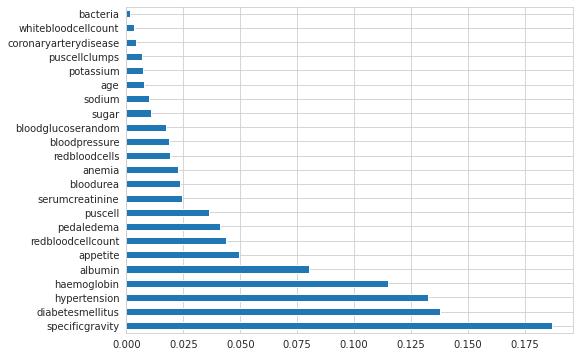

In [25]:
# Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()


Train and Test split

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=33)
print(' x_train.shape : ',x_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' x_test.shape : ',x_test.shape)
print(' y_test.shape : ',y_test.shape)

 x_train.shape :  (280, 23)
 y_train.shape :  (280,)
 x_test.shape :  (120, 23)
 y_test.shape :  (120,)


Standardize the dataset

In [27]:
#x_train=scaler.fit_transform(x_train)

In [28]:
#x_test=scaler.transform(x_test)

In [29]:
#x_train

In [30]:
#x_test

Model Training

In [31]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


Precision:  96.88
Accuracy:  98.33
Recall:  100.0
F1-score:  98.41
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.97      1.00      0.98        62

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120


Confusion Matrix: 
 [[56  2]
 [ 0 62]]


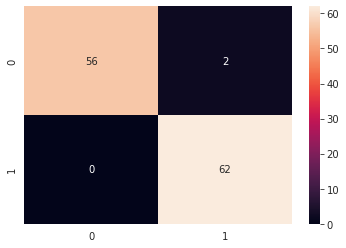

In [32]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(x_train,y_train)

# Predictions:
y_pred = RandomForest.predict(x_test)

# Performance:
q=round(metrics.precision_score(y_test,y_pred)*100,2)
w=round(metrics.accuracy_score(y_test,y_pred)*100,2)
e=round(metrics.recall_score(y_test,y_pred)*100,2)
r=round(metrics.f1_score(y_test,y_pred)*100,2)

print('\nPrecision: ' ,str(q))
print('Accuracy: ' ,str(w))
print('Recall: ' ,str(e))
print('F1-score: ' ,str(r))
print(classification_report(y_test,y_pred))

#display confusion matrix
print('\nConfusion Matrix: \n' ,metrics.confusion_matrix(y_test,y_pred))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True)
plt.show()


Precision:  80.0
Accuracy:  70.83
Recall:  58.06
F1-score:  67.29

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.84      0.74        58
           1       0.80      0.58      0.67        62

    accuracy                           0.71       120
   macro avg       0.73      0.71      0.70       120
weighted avg       0.73      0.71      0.70       120


Confusion Matrix: 
 [[49  9]
 [26 36]]


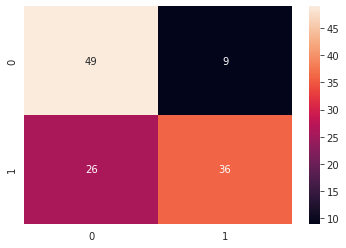

In [33]:
#K-Nearest Neighbour
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

k_nearest_neighbour_model = KNeighborsClassifier()
k_nearest_neighbour_model=k_nearest_neighbour_model.fit(x_train,y_train)
y_pre= k_nearest_neighbour_model.predict(x_test)

#display KNN classification Metrices for SVM
a=round(metrics.precision_score(y_test,y_pre)*100,2)
b=round(metrics.accuracy_score(y_test,y_pre)*100,2)
c=round(metrics.recall_score(y_test,y_pre)*100,2)
d=round(metrics.f1_score(y_test,y_pre)*100,2)

print('\nPrecision: ' ,str(a))
print('Accuracy: ' ,str(b))
print('Recall: ' ,str(c))
print('F1-score: ' ,str(d))
#display classification report for KNN
print('\nClassification Report:\n' ,metrics.classification_report(y_test,y_pre))

#display confusion matrix
print('\nConfusion Matrix: \n' ,metrics.confusion_matrix(y_test,y_pre))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test,y_pre), annot = True)
plt.show()

In [34]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

x = data.iloc[:,:-1]
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x,y, stratify = y, shuffle = True)

logreg.fit(x_train,y_train)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
print("Training score")
logreg.score(x_train,y_train)

Training score


0.9533333333333334

In [36]:
print("testing accuracy")
logreg.score(x_test,y_test)

testing accuracy


0.97

In [37]:
from sklearn import metrics
Y_pred = logreg.predict(x_test)
s=round(metrics.precision_score(y_test,Y_pred)*100,2)
f=round(metrics.accuracy_score(y_test,Y_pred)*100,2)
g=round(metrics.recall_score(y_test,Y_pred)*100,2)
h=round(metrics.f1_score(y_test,Y_pred)*100,2)

print('\nPrecision: ' ,str(s))
print('Accuracy: ' ,str(f))
print('Recall: ' ,str(g))
print('F1-score: ' ,str(h))


Precision:  100.0
Accuracy:  97.0
Recall:  95.24
F1-score:  97.56


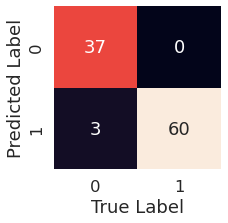

In [38]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

log_pred = logreg.predict(x_test)
plot_conf_mat(y_test, log_pred)


Precision:  100.0
Accuracy:  97.0
Recall:  95.24
F1-score:  97.56

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        37
           1       1.00      0.95      0.98        63

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100


Confusion Matrix: 
 [[37  0]
 [ 3 60]]


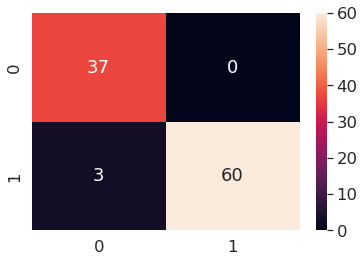

In [39]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier

#initialise the decision tree Model
decision_tree_model = DecisionTreeClassifier(random_state = 0)

decision_tree_model=decision_tree_model.fit(x_train,y_train)
ypred=decision_tree_model.predict(x_test)
#display KNN classification Metrices for Decision Tree
z=round(metrics.precision_score(y_test,ypred)*100,2)
v=round(metrics.accuracy_score(y_test,ypred)*100,2)
n=round(metrics.recall_score(y_test,ypred)*100,2)
m=round(metrics.f1_score(y_test,ypred)*100,2)

print('\nPrecision: ' ,str(z))
print('Accuracy: ' ,str(v))
print('Recall: ' ,str(n))
print('F1-score: ' ,str(m))

#display classification report for Decision Tree
print('\nClassification Report:\n' ,metrics.classification_report(y_test,ypred))

#display confusion matrix
print('\nConfusion Matrix: \n' ,metrics.confusion_matrix(y_test,ypred))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(y_test,ypred), annot = True)
plt.show()

In [40]:
#Precision
precision = [q,a,s,z]
algorithms = ["Randomforest","K-Nearest Neighbors","Logistic Regression","Decision Tree"]    

for i in range(len(algorithms)):
    print("The Precision score achieved using "+algorithms[i]+" is: "+str(precision[i])+" %")

The Precision score achieved using Randomforest is: 96.88 %
The Precision score achieved using K-Nearest Neighbors is: 80.0 %
The Precision score achieved using Logistic Regression is: 100.0 %
The Precision score achieved using Decision Tree is: 100.0 %


In [41]:
#Accuracy
accuracy = [w,b,f,v]
algorithms = ["Randomforest","K-Nearest Neighbors","Logistic Regression","Decision Tree"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(accuracy[i])+" %")

The accuracy score achieved using Randomforest is: 98.33 %
The accuracy score achieved using K-Nearest Neighbors is: 70.83 %
The accuracy score achieved using Logistic Regression is: 97.0 %
The accuracy score achieved using Decision Tree is: 97.0 %


In [42]:
#Recall
recall = [e,c,g,n]
algorithms = ["Randomforest","K-Nearest Neighbors","Logistic Regression","Decision Tree"]    

for i in range(len(algorithms)):
    print("The recall score achieved using "+algorithms[i]+" is: "+str(recall[i])+" %")

The recall score achieved using Randomforest is: 100.0 %
The recall score achieved using K-Nearest Neighbors is: 58.06 %
The recall score achieved using Logistic Regression is: 95.24 %
The recall score achieved using Decision Tree is: 95.24 %


In [43]:
#F1-score
score = [r,d,h,m]
algorithms = ["Randomforest","K-Nearest Neighbors","Logistic Regression","Decision Tree"]    

for i in range(len(algorithms)):
    print("The F1 score achieved using "+algorithms[i]+" is: "+str(score[i])+" %")

The F1 score achieved using Randomforest is: 98.41 %
The F1 score achieved using K-Nearest Neighbors is: 67.29 %
The F1 score achieved using Logistic Regression is: 97.56 %
The F1 score achieved using Decision Tree is: 97.56 %


Based on the above table, it can be noted that Random Forest Classifier has the highest accuracy (99%), highest recall (100%), highest precision (98.4%) and highest F1-score (99.1%) of all the other algorithms.

New Data Prediction

Pickling the model file for deployment

In [44]:
from sklearn.ensemble import RandomForestClassifier
RandomForest= RandomForestClassifier()
RandomForest =RandomForest.fit(x_train,y_train)

In [45]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(RandomForest,x,y,cv=5)
np.mean(cv)

0.9925

In [46]:
import pickle
# Creating a pickle file for the classifier
filename = 'RandomForest.pkl'
pickle.dump(RandomForest, open(filename, 'wb'))

In [47]:
pwd

'/home/wsuser/work'

# Deployment

In [48]:
pip install -U ibm-watson-machine-learning

Note: you may need to restart the kernel to use updated packages.


In [49]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

# Authenticate and Set Space

In [50]:
wml_credentials={
    "apikey":"a-qUIpHZUwdZyhqTXKdDX9PKskdMto90F2YK-FEe1VTw",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [51]:
wml_client=APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  --------------  ------------------------
ID                                    NAME            CREATED
4cc08e3f-9703-49f7-b9fb-c59023271670  ckd_Prediction  2022-11-15T04:47:52.214Z
------------------------------------  --------------  ------------------------


In [52]:
SPACE_ID="4cc08e3f-9703-49f7-b9fb-c59023271670"

In [53]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [54]:
wml_client.software_specifications.list(500)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

# Save and Deploy the Model

In [55]:
import sklearn
sklearn.__version__

'1.0.2'

In [56]:
MODEL_NAME='ckd'
DEPLOYMENT_NAME='ckd_Prediction'
DEMO_MODEL=RandomForest

In [57]:
#set Python version
software_spec_uid=wml_client.software_specifications.get_id_by_name('runtime-22.1-py3.9')

In [58]:
#setup model meta
model_props={
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
    wml_client.repository.ModelMetaNames.TYPE:'scikit-learn_1.0',
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
}

In [59]:
#Save Model
model_details=wml_client.repository.store_model(
    model=DEMO_MODEL,
    meta_props=model_props,
    training_data=x_train,
    training_target=y_train
)

In [60]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'label_column': 'target',
  'schemas': {'input': [{'fields': [{'name': 'age', 'type': 'float64'},
      {'name': 'bloodpressure', 'type': 'float64'},
      {'name': 'specificgravity', 'type': 'float64'},
      {'name': 'albumin', 'type': 'float64'},
      {'name': 'sugar', 'type': 'float64'},
      {'name': 'redbloodcells', 'type': 'float64'},
      {'name': 'puscell', 'type': 'float64'},
      {'name': 'puscellclumps', 'type': 'float64'},
      {'name': 'bacteria', 'type': 'float64'},
      {'name': 'bloodglucoserandom', 'type': 'float64'},
      {'name': 'bloodurea', 'type': 'float64'},
      {'name': 'serumcreatinine', 'type': 'float64'},
      {'name': 'sodium', 'type': 'float64'},
      {'name': 'potassium', 'type': 'float64'},
      {'name': 'haemoglobin', 'type': 'float64'},
      {'name': 'whitebloodcellcount', 'type': 'float64'},
      {'name': 'redbloodcellcount', 'type': 'float64'},
      {'name': 'hypertension', 'type': 'f

In [61]:
model_id=wml_client.repository.get_model_id(model_details)

In [62]:
model_id

'4de3ea4c-4e9d-4b77-b461-3ce44654f34d'

In [64]:
#set Meta
deployment_props={
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [65]:
#Deploy
deployment=wml_client.deployments.create(
artifact_uid=model_id,
meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '4de3ea4c-4e9d-4b77-b461-3ce44654f34d' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='3aadc0e4-27aa-434f-9875-9abaed603306'
------------------------------------------------------------------------------------------------


